In [168]:
import pandas as pd 
import numpy as np
from datetime import datetime,date
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score
from math import *
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from tqdm import tqdm
#from evolutionary_search import EvolutionaryAlgorithmSearchCV


In [169]:
def TracePlot(model, input_X, input_y, input_color = None, max_range = 800):
    plt.figure(figsize = (16,6))

    plot_x1 = np.arange(0,len(input_y))
    plt.plot(plot_x1, input_y)

    plt.plot(plot_x1, model.predict(input_X), color = input_color)

    plt.xlim(0,max_range)
    plt.legend()
    plt.show()

In [170]:
dfx = pd.read_csv(csv_path)
dfx

,year,month,day,irradiation_forecast,temperature_forecast,irradiation,temperature,power
0,2017,1,1,0.000000,2.115371,0.802334,0.720098,0
1,2017,1,1,0.000000,2.185371,1.000000,1.154616,0
2,2017,1,1,0.000000,2.265371,0.891393,1.304207,0
3,2017,1,1,0.000000,2.445371,0.837256,1.079527,0
4,2017,1,1,0.000000,2.845371,0.848814,0.649967,0
...,...,...,...,...,...,...,...,...
36715,2021,3,10,19.610334,4.694629,0.770375,3.713455,0
36716,2021,3,10,0.000000,3.454629,0.987695,2.694212,0
36717,2021,3,10,0.000000,2.124629,0.987637,1.834956,0
36718,2021,3,10,0.000000,1.034629,0.993837,1.209808,0


In [171]:
dfx['time(UTC)'] = pd.to_datetime(dfx[['year','month','day']])

In [172]:
dfx.columns

Index(['year', 'month', 'day', 'irradiation_forecast', 'temperature_forecast',
       'irradiation', 'temperature', 'power', 'time(UTC)'],
      dtype='object')

In [173]:
df = dfx[['time(UTC)','irradiation','temperature']]

In [174]:
df.shape

(36720, 3)

In [175]:
df.set_index('time(UTC)', inplace = True) #UTC-Universal Time Coordinated

In [176]:
df

,irradiation,temperature
time(UTC),,
2017-01-01,0.802334,0.720098
2017-01-01,1.000000,1.154616
2017-01-01,0.891393,1.304207
2017-01-01,0.837256,1.079527
2017-01-01,0.848814,0.649967
...,...,...
2021-03-10,0.770375,3.713455
2021-03-10,0.987695,2.694212
2021-03-10,0.987637,1.834956


In [177]:
df.resample('D', label='left')

In [178]:
opsd_Day_mean = df['irradiation'].resample('D').mean()

In [179]:
opsd_Day_mean.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
               '2021-03-05', '2021-03-06', '2021-03-07', '2021-03-08',
               '2021-03-09', '2021-03-10'],
              dtype='datetime64[ns]', name='time(UTC)', length=1530, freq='D')

In [180]:
df_d = pd.DataFrame(data=opsd_Day_mean, index=opsd_Day_mean.index)

In [181]:
df_d['time(UTC)']=opsd_Day_mean.index
df_d.reset_index(drop=True, inplace=True)
df_d

,irradiation,time(UTC)
0,98.824703,2017-01-01
1,7.734570,2017-01-02
2,9.191607,2017-01-03
3,23.175814,2017-01-04
4,61.680674,2017-01-05
...,...,...
1525,213.458885,2021-03-06
1526,37.296009,2021-03-07
1527,151.429172,2021-03-08
1528,166.981803,2021-03-09


Text(0, 0.5, '$G (kW-hr/m^2/hours)$')

<Figure size 360x2160 with 0 Axes>

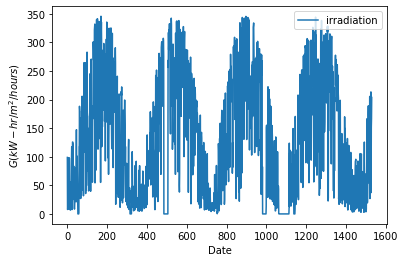

In [189]:
plt.figure(figsize=(5,30))
ax = df_d.plot(y='irradiation');
ax.set_xlabel("Date")
ax.set_ylabel(r'$G (kW-hr/m^2/hours)$')

In [190]:
# X_train = df.drop('irradiation', axis = 1)
# y_train = df['irradiation'].copy().values

# X_test = df.drop('irradiation', axis = 1)
# y_test = df['irradiation'].copy().values


In [191]:
# forest = RandomForestRegressor(n_estimators=100,
#                                min_samples_split = 10,
#                                criterion='mse',
#                               min_samples_leaf = 5,
#                               max_features = 0.5,
#                               max_depth = None)

# forest_params = {
#     'max_depth' : [5,10],
# }
# rs_forest = GridSearchCV(forest, forest_params, cv = 3, verbose=3, n_jobs = 3)
# rs_forest.fit(X_train, y_train)

In [192]:
#Initialize random grid of hyper-params
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [193]:
# dictionary of model params/scores computed on different metric
def model_score_on_different_metric(y_test, y_pred,model_fit):
    score_on_metric_dic =dict()
    score_on_metric_dic['Model parameters']= model_fit.best_params_
    score_on_metric_dic['Mean absolute error']= mean_absolute_error(y_test, y_pred)
    score_on_metric_dic['Root-mean-square error']=sqrt(mean_squared_error(y_test, y_pred))
    score_on_metric_dic['Coefficient of determination']= r2_score(y_test, y_pred)
    return score_on_metric_dic

#functions to control the research  of hyper-parameters
def set_research_interval_min_sample_leaf(min_samples_leaf, setting_larger_search_interval ):
    min_simple_leaf_interval = list()
    min_simple_leaf_interval = [min_samples_leaf+i for i in setting_larger_search_interval if (min_samples_leaf+i)>=1]
    return min_simple_leaf_interval

def set_research_interval_min_sample_split(min_samples_split, setting_larger_search_interval ):
    min_simple_split_interval = list()
    min_simple_split_interval = [min_samples_split+i for i in setting_larger_search_interval 
                                     if (min_samples_split+i) >=2]
    return min_simple_split_interval

def set_research_interval_n_estimators(n_estimators, setting_larger_search_interval ):
    n_estimators_interval = list()
    n_estimators_interval = [n_estimators+i for i in setting_larger_search_interval 
                                     if (n_estimators+i) >=100]
    return n_estimators_interval

def set_research_interval_max_depth(max_depth, setting_larger_search_interval ):
    max_depth_interval = list()
    max_depth_interval = [max_depth+i for i in setting_larger_search_interval 
                                     if (max_depth+i) >=2]
    return  max_depth_interval

In [194]:
X = df_d.drop(columns='irradiation')
Y = df_d['irradiation']
X
Y

0        98.824703
1         7.734570
2         9.191607
3        23.175814
4        61.680674
           ...    
1525    213.458885
1526     37.296009
1527    151.429172
1528    166.981803
1529    203.732831
Name: irradiation, Length: 1530, dtype: float64

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.2min finished


Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 5184 out of 5184 | elapsed: 22.9min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished


Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 15.8min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished


Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  9.6min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished


Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 16.0min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished


Fitting 3 folds for each of 1500 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  5.5min finished


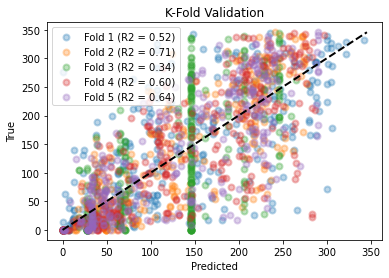

In [195]:
#Main script of model
random_forest_score=[]
score = float()
model_parameters_score_on_metric = dict()
#Random Search Training
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)
cv = model_selection.KFold(n_splits=5, shuffle=True)
# Fit the random search model
i=1
for train, test in cv.split(X, Y):
    
    rf_random.fit(X.iloc[train,:], Y.iloc[train])
    param_grid = {'bootstrap': [rf_random.best_params_['bootstrap']],
    'max_depth': set_research_interval_max_depth(rf_random.best_params_['max_depth'],[-10,-5,-1,1,5,10]),
    'max_features': [rf_random.best_params_['max_features']],
    'min_samples_leaf': set_research_interval_min_sample_leaf(rf_random.best_params_['min_samples_leaf'],[-8,-3,-1,1,3,8]),
    'min_samples_split': set_research_interval_min_sample_split(rf_random.best_params_['min_samples_split'],[-6,-2,-1,1,2,6]),
    'n_estimators': set_research_interval_min_sample_split(rf_random.best_params_['n_estimators'],[-100,-80,-40,-20,-10,-5,5,10,20,40,80,100])
     }
    rf = RandomForestRegressor()
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2,refit=True)
    grid_search.fit(X.iloc[train,:], Y.iloc[train])
    best_grid = grid_search.best_estimator_
    y_prd=best_grid.predict(X.iloc[test,:])
    score = r2_score(Y.iloc[test], y_prd)  
    model_parameters_score_on_metric["Model_%s"%i]= model_score_on_different_metric(Y.iloc[test], y_prd, grid_search)   
    random_forest_score.append(score) 
    plt.scatter(y_prd, Y.iloc[test], lw=2, alpha=0.3, label='Fold %d (R2 = %0.2f)' % (i,score))
    i= i +1
#plot R2 scores for each model  
plt.plot([min(Y),max(Y)], [min(Y),max(Y)], linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [196]:
Best_model= random_forest_score.index(max(random_forest_score)) + 1
model_parameters_score_on_metric['Model_%s'%Best_model]

{'Model parameters': {'bootstrap': True,
  'max_depth': 69,
  'max_features': 'auto',
  'min_samples_leaf': 12,
  'min_samples_split': 8,
  'n_estimators': 360},
 'Mean absolute error': 44.68198643005299,
 'Root-mean-square error': 57.546984930309414,
 'Coefficient of determination': 0.7149052242635214}

In [197]:
# Models parameters 
model_parameters_score_on_metric

{'Model_1': {'Model parameters': {'bootstrap': False,
   'max_depth': 20,
   'max_features': 'sqrt',
   'min_samples_leaf': 1,
   'min_samples_split': 8,
   'n_estimators': 900},
  'Mean absolute error': 52.308315300320466,
  'Root-mean-square error': 72.81286931750445,
  'Coefficient of determination': 0.5225055124142797},
 'Model_2': {'Model parameters': {'bootstrap': True,
   'max_depth': 69,
   'max_features': 'auto',
   'min_samples_leaf': 12,
   'min_samples_split': 8,
   'n_estimators': 360},
  'Mean absolute error': 44.68198643005299,
  'Root-mean-square error': 57.546984930309414,
  'Coefficient of determination': 0.7149052242635214},
 'Model_3': {'Model parameters': {'bootstrap': False,
   'max_depth': 5,
   'max_features': 'auto',
   'min_samples_leaf': 9,
   'min_samples_split': 3,
   'n_estimators': 900},
  'Mean absolute error': 68.9614471333966,
  'Root-mean-square error': 83.55905759309732,
  'Coefficient of determination': 0.33546563140876695},
 'Model_4': {'Model para

In [220]:
#Compute average error on each metric for the random-forest model
#sum_Mean_absolute_error = 0
sum_Root_mean_square_error = 0
sum_Coefficient_of_determination = 0

for model in model_parameters_score_on_metric:
    sum_Mean_absolute_error= sum_Mean_absolute_error+ model_parameters_score_on_metric[model]['Mean absolute error']
    sum_Root_mean_square_error= sum_Root_mean_square_error + model_parameters_score_on_metric[model]['Root-mean-square error']
    sum_Coefficient_of_determination= sum_Coefficient_of_determination + model_parameters_score_on_metric[model]['Coefficient of determination']

    
average_Mean_absolute_error = sum_Mean_absolute_error / len(model_parameters_score_on_metric)
average_Root_mean_square_error = sum_Root_mean_square_error / len(model_parameters_score_on_metric)
average_Coefficient_of_determination = sum_Coefficient_of_determination / len(model_parameters_score_on_metric)

In [223]:
# print scores on different metric
print("-----------------------SCORE_RANDOM_FOREST_MODEL------------------------------\n")
#print('Average Mean absolute error:%s'%average_Mean_absolute_error)
print('\nAverage Root mean square error:%s'%average_Root_mean_square_error)
print('\nAverage Coefficient of determination:%s'%average_Coefficient_of_determination)

-----------------------SCORE_RANDOM_FOREST_MODEL------------------------------


Average Root mean square error:68.58363983991985

Average Coefficient of determination:0.5613182765623385


In [ ]:
#Days

In [203]:
df1 = df.copy()

In [204]:
df1

,irradiation,temperature
time(UTC),,
2017-01-01,0.802334,0.720098
2017-01-01,1.000000,1.154616
2017-01-01,0.891393,1.304207
2017-01-01,0.837256,1.079527
2017-01-01,0.848814,0.649967
...,...,...
2021-03-10,0.770375,3.713455
2021-03-10,0.987695,2.694212
2021-03-10,0.987637,1.834956


In [205]:
df1.resample('W', label='left')

In [207]:
opsd_weekly_mean = df1['irradiation'].resample('W').mean()

In [208]:
opsd_weekly_mean.index

DatetimeIndex(['2017-01-01', '2017-01-08', '2017-01-15', '2017-01-22',
               '2017-01-29', '2017-02-05', '2017-02-12', '2017-02-19',
               '2017-02-26', '2017-03-05',
               ...
               '2021-01-10', '2021-01-17', '2021-01-24', '2021-01-31',
               '2021-02-07', '2021-02-14', '2021-02-21', '2021-02-28',
               '2021-03-07', '2021-03-14'],
              dtype='datetime64[ns]', name='time(UTC)', length=220, freq='W-SUN')

In [211]:
df1_w = pd.DataFrame(data=opsd_weekly_mean, index=opsd_weekly_mean.index)

In [213]:
df1_w['time(UTC)']=opsd_weekly_mean.index
df1_w.reset_index(drop=True, inplace=True)
df1_w

,irradiation,time(UTC)
0,98.824703,2017-01-01
1,41.115110,2017-01-08
2,48.468265,2017-01-15
3,37.737983,2017-01-22
4,83.020672,2017-01-29
...,...,...
215,45.429489,2021-02-14
216,102.149481,2021-02-21
217,144.057295,2021-02-28
218,120.496597,2021-03-07


Text(0, 0.5, '$G (kW-hr/m^2/week)$')

<Figure size 360x2160 with 0 Axes>

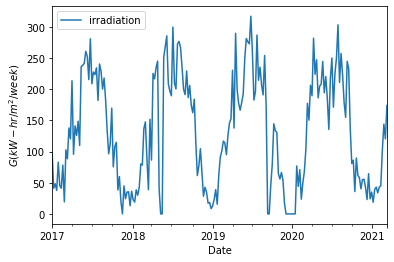

In [214]:
plt.figure(figsize=(5,30))
ax = df1_w.plot(x='time(UTC)', y='irradiation');
ax.set_xlabel("Date")
ax.set_ylabel(r'$G (kW-hr/m^2/week)$')

In [215]:
#Initialize random grid of hyper-params
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [216]:
# dictionary of model params/scores computed on different metric
def model_score_on_different_metric(y_test, y_pred,model_fit):
    score_on_metric_dic =dict()
    score_on_metric_dic['Model parameters']= model_fit.best_params_
    score_on_metric_dic['Mean absolute error']= mean_absolute_error(y_test, y_pred)
    score_on_metric_dic['Root-mean-square error']=sqrt(mean_squared_error(y_test, y_pred))
    score_on_metric_dic['Coefficient of determination']= r2_score(y_test, y_pred)
    return score_on_metric_dic

#functions to control the research  of hyper-parameters
def set_research_interval_min_sample_leaf(min_samples_leaf, setting_larger_search_interval ):
    min_simple_leaf_interval = list()
    min_simple_leaf_interval = [min_samples_leaf+i for i in setting_larger_search_interval if (min_samples_leaf+i)>=1]
    return min_simple_leaf_interval

def set_research_interval_min_sample_split(min_samples_split, setting_larger_search_interval ):
    min_simple_split_interval = list()
    min_simple_split_interval = [min_samples_split+i for i in setting_larger_search_interval 
                                     if (min_samples_split+i) >=2]
    return min_simple_split_interval

def set_research_interval_n_estimators(n_estimators, setting_larger_search_interval ):
    n_estimators_interval = list()
    n_estimators_interval = [n_estimators+i for i in setting_larger_search_interval 
                                     if (n_estimators+i) >=100]
    return n_estimators_interval

def set_research_interval_max_depth(max_depth, setting_larger_search_interval ):
    max_depth_interval = list()
    max_depth_interval = [max_depth+i for i in setting_larger_search_interval 
                                     if (max_depth+i) >=2]
    return  max_depth_interval

In [219]:
X = df1_w.drop(columns='irradiation')
Y = df1_w['irradiation']
X
Y

0       98.824703
1       41.115110
2       48.468265
3       37.737983
4       83.020672
          ...    
215     45.429489
216    102.149481
217    144.057295
218    120.496597
219    174.047935
Name: irradiation, Length: 220, dtype: float64

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished


Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 27.7min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.6min finished


Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed:  6.0min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished


Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 13.2min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished


Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 27.4min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.8min finished


Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 1944 out of 1944 | elapsed: 16.9min finished


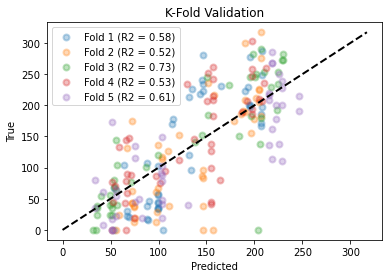

In [224]:
#Main script of model
random_forest_score=[]
score = float()
model_parameters_score_on_metric = dict()
#Random Search Training
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)
cv = model_selection.KFold(n_splits=5, shuffle=True)
# Fit the random search model
i=1
for train, test in cv.split(X, Y):
    
    rf_random.fit(X.iloc[train,:], Y.iloc[train])
    param_grid = {'bootstrap': [rf_random.best_params_['bootstrap']],
    'max_depth': set_research_interval_max_depth(rf_random.best_params_['max_depth'],[-10,-5,-1,1,5,10]),
    'max_features': [rf_random.best_params_['max_features']],
    'min_samples_leaf': set_research_interval_min_sample_leaf(rf_random.best_params_['min_samples_leaf'],[-8,-3,-1,1,3,8]),
    'min_samples_split': set_research_interval_min_sample_split(rf_random.best_params_['min_samples_split'],[-6,-2,-1,1,2,6]),
    'n_estimators': set_research_interval_min_sample_split(rf_random.best_params_['n_estimators'],[-100,-80,-40,-20,-10,-5,5,10,20,40,80,100])
     }
    rf = RandomForestRegressor()
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2,refit=True)
    grid_search.fit(X.iloc[train,:], Y.iloc[train])
    best_grid = grid_search.best_estimator_
    y_prd=best_grid.predict(X.iloc[test,:])
    score = r2_score(Y.iloc[test], y_prd)  
    model_parameters_score_on_metric["Model_%s"%i]= model_score_on_different_metric(Y.iloc[test], y_prd, grid_search)   
    random_forest_score.append(score) 
    plt.scatter(y_prd, Y.iloc[test], lw=2, alpha=0.3, label='Fold %d (R2 = %0.2f)' % (i,score))
    i= i +1
#plot R2 scores for each model  
plt.plot([min(Y),max(Y)], [min(Y),max(Y)], linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [225]:
Best_model= random_forest_score.index(max(random_forest_score)) + 1
model_parameters_score_on_metric['Model_%s'%Best_model]

{'Model parameters': {'bootstrap': True,
  'max_depth': 69,
  'max_features': 'auto',
  'min_samples_leaf': 3,
  'min_samples_split': 11,
  'n_estimators': 320},
 'Mean absolute error': 35.28805874113633,
 'Root-mean-square error': 49.904018230431575,
 'Coefficient of determination': 0.725608538766678}

In [226]:
#Months

In [227]:
df2 = df.copy()

In [234]:
df2

,irradiation,temperature
time(UTC),,
2017-01-01,0.802334,0.720098
2017-01-01,1.000000,1.154616
2017-01-01,0.891393,1.304207
2017-01-01,0.837256,1.079527
2017-01-01,0.848814,0.649967
...,...,...
2021-03-10,0.770375,3.713455
2021-03-10,0.987695,2.694212
2021-03-10,0.987637,1.834956


In [228]:
df2.resample('M', label='left')

In [229]:
opsd_month_mean = df2['irradiation'].resample('M').mean()

In [230]:
opsd_month_mean.index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31'],
              dtype='datetime64[ns]', name='time(UTC)', freq='M')

In [231]:
df_m = pd.DataFrame(data=opsd_month_mean, index=opsd_month_mean.index)

In [232]:
df_m['time(UTC)']=opsd_month_mean.index
df_m.reset_index(drop=True, inplace=True)
df_m

,irradiation,time(UTC)
0,55.415484,2017-01-31
1,40.837291,2017-02-28
2,135.065180,2017-03-31
3,134.488075,2017-04-30
4,209.077359,2017-05-31
5,246.318754,2017-06-30
6,219.400428,2017-07-31
7,225.690481,2017-08-31
8,119.180937,2017-09-30
9,86.575660,2017-10-31


Text(0, 0.5, '$G (kW-hr/m^2/Month)$')

<Figure size 360x2160 with 0 Axes>

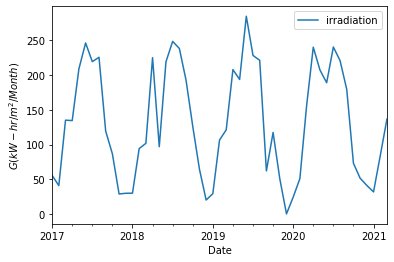

In [233]:
plt.figure(figsize=(5,30))
ax = df_m.plot(x='time(UTC)', y='irradiation');
ax.set_xlabel("Date")
ax.set_ylabel(r'$G (kW-hr/m^2/Month)$')

In [235]:
#Initialize random grid of hyper-params
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [236]:
# dictionary of model params/scores computed on different metric
def model_score_on_different_metric(y_test, y_pred,model_fit):
    score_on_metric_dic =dict()
    score_on_metric_dic['Model parameters']= model_fit.best_params_
    score_on_metric_dic['Mean absolute error']= mean_absolute_error(y_test, y_pred)
    score_on_metric_dic['Root-mean-square error']=sqrt(mean_squared_error(y_test, y_pred))
    score_on_metric_dic['Coefficient of determination']= r2_score(y_test, y_pred)
    return score_on_metric_dic

#functions to control the research  of hyper-parameters
def set_research_interval_min_sample_leaf(min_samples_leaf, setting_larger_search_interval ):
    min_simple_leaf_interval = list()
    min_simple_leaf_interval = [min_samples_leaf+i for i in setting_larger_search_interval if (min_samples_leaf+i)>=1]
    return min_simple_leaf_interval

def set_research_interval_min_sample_split(min_samples_split, setting_larger_search_interval ):
    min_simple_split_interval = list()
    min_simple_split_interval = [min_samples_split+i for i in setting_larger_search_interval 
                                     if (min_samples_split+i) >=2]
    return min_simple_split_interval

def set_research_interval_n_estimators(n_estimators, setting_larger_search_interval ):
    n_estimators_interval = list()
    n_estimators_interval = [n_estimators+i for i in setting_larger_search_interval 
                                     if (n_estimators+i) >=100]
    return n_estimators_interval

def set_research_interval_max_depth(max_depth, setting_larger_search_interval ):
    max_depth_interval = list()
    max_depth_interval = [max_depth+i for i in setting_larger_search_interval 
                                     if (max_depth+i) >=2]
    return  max_depth_interval

In [240]:
X = df_m.drop(columns='irradiation')
Y = df_m['irradiation']
X
Y

0      55.415484
1      40.837291
2     135.065180
3     134.488075
4     209.077359
5     246.318754
6     219.400428
7     225.690481
8     119.180937
9      86.575660
10     28.720160
11     29.744863
12     29.876479
13     94.141397
14    101.699257
15    225.053037
16     96.899579
17    219.205987
18    248.588875
19    238.365836
20    192.691304
21    126.317964
22     64.525421
23     20.003971
24     29.192642
25    106.447852
26    121.146988
27    207.980300
28    193.736608
29    284.809815
30    228.345437
31    221.316291
32     61.934149
33    117.379042
34     50.708924
35      0.000000
36     24.183640
37     50.830566
38    155.459485
39    240.191175
40    207.331496
41    189.011702
42    240.512774
43    220.900694
44    179.367355
45     72.972887
46     51.407880
47     41.038952
48     31.679747
49     83.636935
50    136.561998
Name: irradiation, dtype: float64

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished


Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  5.8min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.8min finished


Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 14.7min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.4min finished


Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  5.4min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished


Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 25.6min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.4min finished


Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 12.8min finished


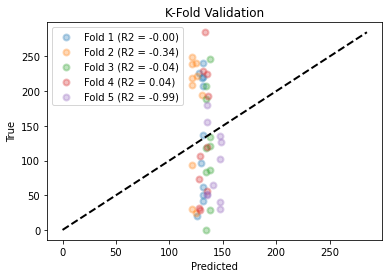

In [241]:
#Main script of model
random_forest_score=[]
score = float()
model_parameters_score_on_metric = dict()
#Random Search Training
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)
cv = model_selection.KFold(n_splits=5, shuffle=True)
# Fit the random search model
i=1
for train, test in cv.split(X, Y):
    
    rf_random.fit(X.iloc[train,:], Y.iloc[train])
    param_grid = {'bootstrap': [rf_random.best_params_['bootstrap']],
    'max_depth': set_research_interval_max_depth(rf_random.best_params_['max_depth'],[-10,-5,-1,1,5,10]),
    'max_features': [rf_random.best_params_['max_features']],
    'min_samples_leaf': set_research_interval_min_sample_leaf(rf_random.best_params_['min_samples_leaf'],[-8,-3,-1,1,3,8]),
    'min_samples_split': set_research_interval_min_sample_split(rf_random.best_params_['min_samples_split'],[-6,-2,-1,1,2,6]),
    'n_estimators': set_research_interval_min_sample_split(rf_random.best_params_['n_estimators'],[-100,-80,-40,-20,-10,-5,5,10,20,40,80,100])
     }
    rf = RandomForestRegressor()
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2,refit=True)
    grid_search.fit(X.iloc[train,:], Y.iloc[train])
    best_grid = grid_search.best_estimator_
    y_prd=best_grid.predict(X.iloc[test,:])
    score = r2_score(Y.iloc[test], y_prd)  
    model_parameters_score_on_metric["Model_%s"%i]= model_score_on_different_metric(Y.iloc[test], y_prd, grid_search)   
    random_forest_score.append(score) 
    plt.scatter(y_prd, Y.iloc[test], lw=2, alpha=0.3, label='Fold %d (R2 = %0.2f)' % (i,score))
    i= i +1
#plot R2 scores for each model  
plt.plot([min(Y),max(Y)], [min(Y),max(Y)], linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [242]:
Best_model= random_forest_score.index(max(random_forest_score)) + 1
model_parameters_score_on_metric['Model_%s'%Best_model]

{'Model parameters': {'bootstrap': True,
  'max_depth': 55,
  'max_features': 'sqrt',
  'min_samples_leaf': 12,
  'min_samples_split': 4,
  'n_estimators': 790},
 'Mean absolute error': 76.28719865013628,
 'Root-mean-square error': 85.30917150380584,
 'Coefficient of determination': 0.03873589834898661}

In [243]:
#hours

In [244]:
df


,irradiation,temperature
time(UTC),,
2017-01-01,0.802334,0.720098
2017-01-01,1.000000,1.154616
2017-01-01,0.891393,1.304207
2017-01-01,0.837256,1.079527
2017-01-01,0.848814,0.649967
...,...,...
2021-03-10,0.770375,3.713455
2021-03-10,0.987695,2.694212
2021-03-10,0.987637,1.834956


Text(0, 0.5, '$Irradiation (W/m^2)$')

<Figure size 360x2160 with 0 Axes>

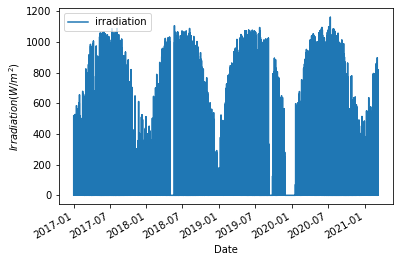

In [255]:
plt.figure(figsize=(5,30))
ax = df.plot(y='irradiation');
ax.set_xlabel("Date")
ax.set_ylabel(r'$Irradiation (W/m^2)$')

In [247]:
#Initialize random grid of hyper-params
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [248]:
# dictionary of model params/scores computed on different metric
def model_score_on_different_metric(y_test, y_pred,model_fit):
    score_on_metric_dic =dict()
    score_on_metric_dic['Model parameters']= model_fit.best_params_
    score_on_metric_dic['Mean absolute error']= mean_absolute_error(y_test, y_pred)
    score_on_metric_dic['Root-mean-square error']=sqrt(mean_squared_error(y_test, y_pred))
    score_on_metric_dic['Coefficient of determination']= r2_score(y_test, y_pred)
    return score_on_metric_dic

#functions to control the research  of hyper-parameters
def set_research_interval_min_sample_leaf(min_samples_leaf, setting_larger_search_interval ):
    min_simple_leaf_interval = list()
    min_simple_leaf_interval = [min_samples_leaf+i for i in setting_larger_search_interval if (min_samples_leaf+i)>=1]
    return min_simple_leaf_interval

def set_research_interval_min_sample_split(min_samples_split, setting_larger_search_interval ):
    min_simple_split_interval = list()
    min_simple_split_interval = [min_samples_split+i for i in setting_larger_search_interval 
                                     if (min_samples_split+i) >=2]
    return min_simple_split_interval

def set_research_interval_n_estimators(n_estimators, setting_larger_search_interval ):
    n_estimators_interval = list()
    n_estimators_interval = [n_estimators+i for i in setting_larger_search_interval 
                                     if (n_estimators+i) >=100]
    return n_estimators_interval

def set_research_interval_max_depth(max_depth, setting_larger_search_interval ):
    max_depth_interval = list()
    max_depth_interval = [max_depth+i for i in setting_larger_search_interval 
                                     if (max_depth+i) >=2]
    return  max_depth_interval

In [251]:
X = df.drop(columns='irradiation')
Y = df['irradiation']
X
Y

time(UTC)
2017-01-01    0.802334
2017-01-01    1.000000
2017-01-01    0.891393
2017-01-01    0.837256
2017-01-01    0.848814
                ...   
2021-03-10    0.770375
2021-03-10    0.987695
2021-03-10    0.987637
2021-03-10    0.993837
2021-03-10    0.987654
Name: irradiation, Length: 36720, dtype: float64

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 43.1min finished


Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 62.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 91.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 127.1min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 178.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 247.4min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 270.7min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 43.9min finished


Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 61.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 92.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 132.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 188.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 254.5min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 276.6min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 43.7min finished


Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 61.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 90.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 126.8min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 177.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 239.2min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 260.9min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 44.2min finished


Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 62.8min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 93.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 130.3min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 181.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 244.3min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 266.4min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 42.6min finished


Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 61.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 91.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 128.7min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 180.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 243.5min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 265.4min finished


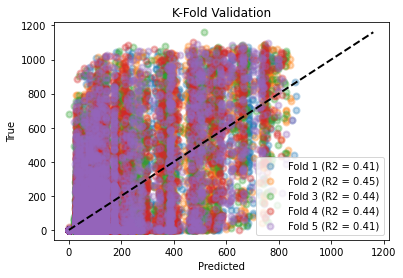

In [252]:
#Main script of model
random_forest_score=[]
score = float()
model_parameters_score_on_metric = dict()
#Random Search Training
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)
cv = model_selection.KFold(n_splits=5, shuffle=True)
# Fit the random search model
i=1
for train, test in cv.split(X, Y):
    
    rf_random.fit(X.iloc[train,:], Y.iloc[train])
    param_grid = {'bootstrap': [rf_random.best_params_['bootstrap']],
    'max_depth': set_research_interval_max_depth(rf_random.best_params_['max_depth'],[-10,-5,-1,1,5,10]),
    'max_features': [rf_random.best_params_['max_features']],
    'min_samples_leaf': set_research_interval_min_sample_leaf(rf_random.best_params_['min_samples_leaf'],[-8,-3,-1,1,3,8]),
    'min_samples_split': set_research_interval_min_sample_split(rf_random.best_params_['min_samples_split'],[-6,-2,-1,1,2,6]),
    'n_estimators': set_research_interval_min_sample_split(rf_random.best_params_['n_estimators'],[-100,-80,-40,-20,-10,-5,5,10,20,40,80,100])
     }
    rf = RandomForestRegressor()
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2,refit=True)
    grid_search.fit(X.iloc[train,:], Y.iloc[train])
    best_grid = grid_search.best_estimator_
    y_prd=best_grid.predict(X.iloc[test,:])
    score = r2_score(Y.iloc[test], y_prd)  
    model_parameters_score_on_metric["Model_%s"%i]= model_score_on_different_metric(Y.iloc[test], y_prd, grid_search)   
    random_forest_score.append(score) 
    plt.scatter(y_prd, Y.iloc[test], lw=2, alpha=0.3, label='Fold %d (R2 = %0.2f)' % (i,score))
    i= i +1
#plot R2 scores for each model  
plt.plot([min(Y),max(Y)], [min(Y),max(Y)], linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [253]:
Best_model= random_forest_score.index(max(random_forest_score)) + 1
model_parameters_score_on_metric['Model_%s'%Best_model]

{'Model parameters': {'bootstrap': True,
  'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_leaf': 5,
  'min_samples_split': 11,
  'n_estimators': 990},
 'Mean absolute error': 117.38994653530015,
 'Root-mean-square error': 184.3875361093617,
 'Coefficient of determination': 0.4463934847954365}